In [1]:
!pip install gurobipy

In [2]:
import gurobipy as gp
from gurobipy import GRB
import random

In [3]:
import networkx as nx

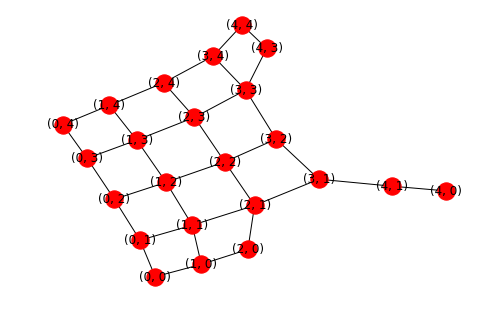

In [6]:
# Create a graph and visualize it
G = nx.grid_2d_graph(5,5)
number_of_nodes_to_remove = 2
for i in range(number_of_nodes_to_remove):
  G.remove_node(random.choice(list(G.nodes)))

import matplotlib.pyplot as plt
nx.draw(G, with_labels = True)

In [7]:
def find_neighbours(new_graph, i, level = 2):
  l = list(nx.ego_graph(new_graph, i, level).nodes)
  l.remove(i)
  return(l)

In [8]:
# Create model object
m = gp.Model()

m.setParam('OutputFlag', 0)


# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# Objective function: minimize number of nodes
m.setObjective( gp.quicksum( x[i] for i in G.nodes ), GRB.MINIMIZE )

# Add constraint for each node
m.addConstrs( x[i] + gp.quicksum( x[j] for j in find_neighbours(G, i) ) >= 1 for i in G.nodes )

# Solve
m.optimize()

Restricted license - for non-production use only - expires 2024-10-28


In [9]:
print("Number of police vehicles required:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

Number of police vehicles required: 4.0


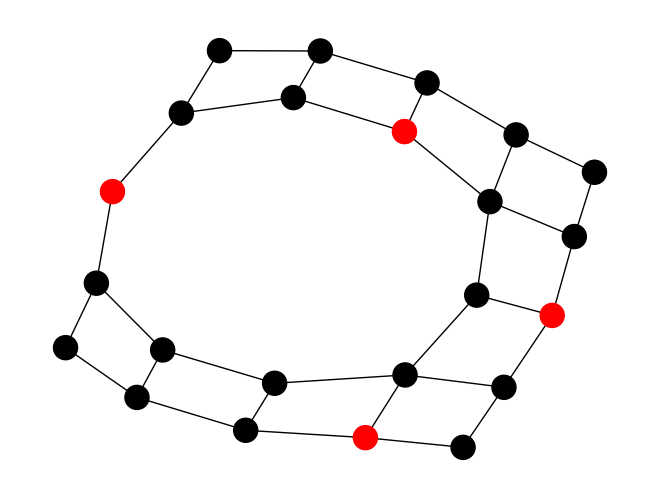

In [18]:
# Visualize the solution
node_colors = [ "red" if i in selected_nodes else "black" for i in G.nodes ]

nx.draw( G, node_color=node_colors )

In [9]:
random.choice(list(G.nodes))

(4, 0)

In [10]:
G.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 4), (1, 5), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)))